# Cleaning Data

### Common data problems
* Inconsistent column names
* Missing data
* Outliers
* Duplicate rows
* Untidy
* Need to process columns
* Column types can signal unexpected data values

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumBarunGothic'

## 1. Explore Data

각 국가의 년도별 전체 인구 대비 도시 인구 점유율

In [2]:
df = pd.read_csv('data/ind_pop_data.csv')
df.head()

,CountryName,CountryCode,Year,TotalPop,UrbanPopRatio
0,Afghanistan,AFG,1960,8990000.0,8.22
1,Afghanistan,AFG,1961,9160000.0,8.51
2,Afghanistan,AFG,1962,9340000.0,8.81
3,Afghanistan,AFG,1963,9530000.0,9.11
4,Afghanistan,AFG,1964,9730000.0,9.43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14612 entries, 0 to 14611
Data columns (total 5 columns):
CountryName      14612 non-null object
CountryCode      14612 non-null object
Year             14612 non-null int64
TotalPop         14612 non-null float64
UrbanPopRatio    14612 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 570.9+ KB


In [4]:
# 숫자형 데이터
df.describe()

,Year,TotalPop,UrbanPopRatio
count,14612.000000,1.461200e+04,14612.000000
mean,1987.492883,2.033594e+08,48.429783
std,16.160258,6.684231e+08,25.236047
min,1960.000000,0.000000e+00,0.000000
25%,1973.000000,8.495000e+05,28.000000
50%,1987.000000,6.130000e+06,46.400000
75%,2001.000000,4.140000e+07,68.100000
max,2015.000000,7.350000e+09,100.000000


In [5]:
# 범주형 데이터
df['CountryName'].value_counts(dropna=False).head(10)

Colombia                    56
Pre-demographic dividend    56
Jamaica                     56
Macao SAR, China            56
Mauritania                  56
Vietnam                     56
Honduras                    56
Finland                     56
Libya                       56
Grenada                     56
Name: CountryName, dtype: int64

전체 인구

In [6]:
print(max(df['TotalPop']))  # 73 억
print(min(df['TotalPop']))

7350000000.0
0.0


Text(0.5, 0, 'Total Population')

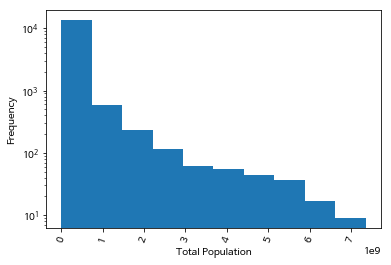

In [7]:
df['TotalPop'].plot(kind='hist', rot=70, logy=True)
plt.xlabel('Total Population')

2015년 도시인구 점유율

In [8]:
df2015 = df[df.Year == 2015]
df2015['UrbanPopRatio'].describe()

count    260.000000
mean      58.127115
std       23.666908
min        0.000000
25%       39.450000
50%       57.950000
75%       77.700000
max      100.000000
Name: UrbanPopRatio, dtype: float64

Text(0.5, 1.0, '2015 국가별 도시인구 점유율 분포')

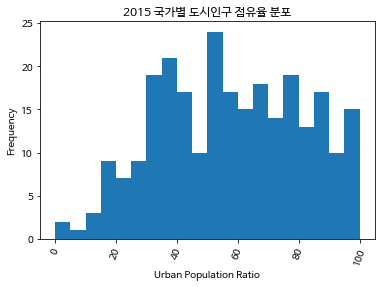

In [9]:
df2015 = df[df.Year == 2015]
df2015['UrbanPopRatio'].plot(kind='hist', rot=70, bins=20)
plt.xlabel('Urban Population Ratio')
plt.title('2015 국가별 도시인구 점유율 분포')

2015년 도시인구 점유율 90% 이상 국가

In [10]:
df2015_up90 = df2015[df2015.UrbanPopRatio >= 90]
df2015_up90

,CountryName,CountryCode,Year,TotalPop,UrbanPopRatio
503,Argentina,ARG,2015,43400000.0,91.8
1119,Belgium,BEL,2015,11300000.0,97.9
1287,Bermuda,BMU,2015,65200.0,100.0
2183,Cayman Islands,CYM,2015,60000.0,100.0
4923,Gibraltar,GIB,2015,32200.0,100.0
5147,Guam,GUM,2015,170000.0,94.5
5651,"Hong Kong SAR, China",HKG,2015,7310000.0,100.0
5819,Iceland,ISL,2015,331000.0,94.1
6435,Israel,ISR,2015,8380000.0,92.1
6603,Japan,JPN,2015,127000000.0,93.5


* 2000년에 전체 인구 대비 90% 이상이 도시 지역에 밀집해 있는 국가들이 상당수 있다.
* 도시인구비율이 100%인 국가들은 작은 섬나라 또는 싱가폴, 홍콩 같은 작은 영토 국가임을 알 수 있다.

Text(0.5, 1.0, 'log(TotalPop)')

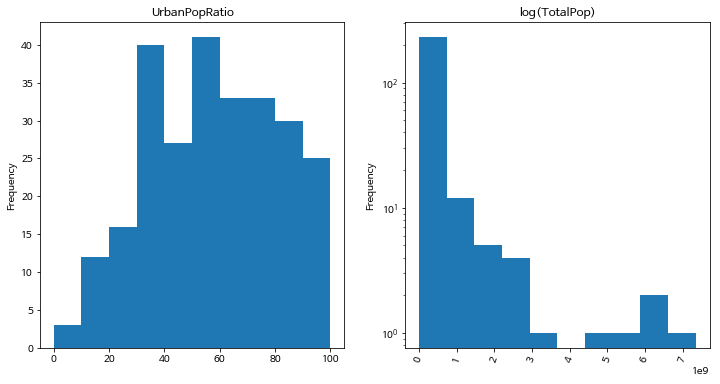

In [11]:
# subplot(mnx) : m 행 n 열의 x 번째
plt.figure(figsize=(12,6))
plt.subplot(121)
df2015['UrbanPopRatio'].plot(kind='hist')
plt.title('UrbanPopRatio')
plt.subplot(122)
df2015['TotalPop'].plot(kind='hist', rot=70, logy=True)
plt.title('log(TotalPop)')

한국, 일본, 중국, 인도의 1960 - 2015년 도시인구 점유율 비교

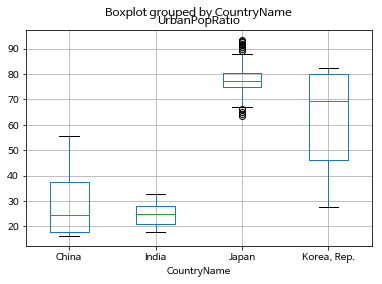

In [12]:
df_4nation = df[df['CountryCode'].isin(['KOR','JPN','CHN','IND'])]
df_4nation.boxplot(column='UrbanPopRatio', by='CountryName')

* 중국과 인도는 인구가 도시에 밀접한 비율이 대체로 50% 이하이다.
* 일본은 1960년대부터 이미 도시 인구가 전체 인구의 60% 이상이었다. 도시중심의 생활권 형성.
* 한국은 도시인구의 점유율 폭이 상대적으로 매우 넓다. 초기에는 도시인구가 많지 않았으나 점차 증가하면서 80%를 넘기도 했다.

도시인구 점유율 변화 추세

In [13]:
df_k = df[df['CountryCode'] == 'KOR']
df_j = df[df['CountryCode'] == 'JPN']
df_c = df[df['CountryCode'] == 'CHN']
df_i = df[df['CountryCode'] == 'IND']

df_4na = pd.DataFrame()
df_4na['Year'] = pd.Series(list(df_k['Year']))
df_4na['Korea'] = pd.Series(list(df_k['UrbanPopRatio']))
df_4na['Japan'] = pd.Series(list(df_j['UrbanPopRatio']))
df_4na['China'] = pd.Series(list(df_c['UrbanPopRatio']))
df_4na['India'] = pd.Series(list(df_i['UrbanPopRatio']))
df_4na.head()

,Year,Korea,Japan,China,India
0,1960,27.7,63.3,16.2,17.9
1,1961,28.5,64.2,16.7,18.0
2,1962,29.5,65.1,17.2,18.2
3,1963,30.4,66.1,17.8,18.4
4,1964,31.4,67.0,18.3,18.6


In [14]:
df_4na.shape

(56, 5)

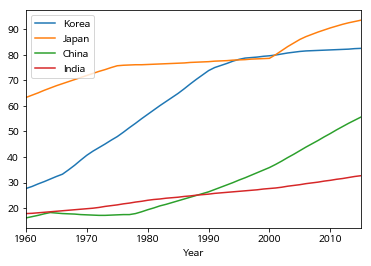

In [15]:
df_4na.plot(x = 'Year')

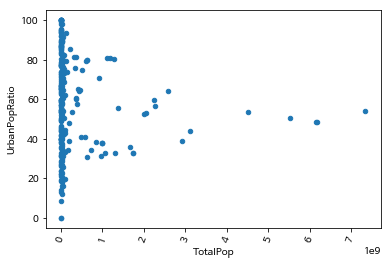

In [16]:
# scatter plot
df2015.plot(kind='scatter', x='TotalPop', y='UrbanPopRatio', rot=70)

## 2. Tidying data

Principles of tidy data (melting)

* column - separate variables
* row - individual observations


In [17]:
df_air = pd.read_csv('data/airquality.csv')
df_air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [18]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB


### Filling missing data

In [19]:
oz_mean = df_air.Ozone.mean()
df_air['Ozone'] = df_air.Ozone.fillna(oz_mean)
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB


### reshaping data using melt

In [20]:
# df_melt = pd.melt(frame=df_air, id_vars=['Month','Day'], value_vars=['Ozone', 'Solar.R', 'Wind', 'Temp'])

df_melt = pd.melt(df_air, id_vars=['Month', 'Day'])  # 나머지는 variable, value 컬럼으로 자동정리
df_melt.head()

,Month,Day,variable,value
0,5,1,Ozone,41.00000
1,5,2,Ozone,36.00000
2,5,3,Ozone,12.00000
3,5,4,Ozone,18.00000
4,5,5,Ozone,42.12931


In [21]:
# 컬럼명 지정
df_melt = pd.melt(df_air, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')
df_melt.head()

,Month,Day,measurement,reading
0,5,1,Ozone,41.00000
1,5,2,Ozone,36.00000
2,5,3,Ozone,12.00000
3,5,4,Ozone,18.00000
4,5,5,Ozone,42.12931


### pivot_table : un-melting

* Melting: turn columns into rows
* Pivoting: turn unique values into separate columns
* Analysis friendly shape to reporting friendly shape
* Violates tidy data principle: rows contain observations
* Multiple variables stored in the same column

In [22]:
# Pivot - hierarchical index
df_pivot = df_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')
df_pivot.head()

measurement     Ozone  Solar.R  Temp  Wind
Month Day                                 
5     1      41.00000    190.0  67.0   7.4
      2      36.00000    118.0  72.0   8.0
      3      12.00000    149.0  74.0  12.6
      4      18.00000    313.0  62.0  11.5
      5      42.12931      NaN  56.0  14.3

In [23]:
# reset index - 원래의 데이터 형태로 되돌아감.
df_pivot = df_pivot.reset_index()
df_pivot.head()

measurement,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.00000,190.0,67.0,7.4
1,5,2,36.00000,118.0,72.0,8.0
2,5,3,12.00000,149.0,74.0,12.6
3,5,4,18.00000,313.0,62.0,11.5
4,5,5,42.12931,NaN,56.0,14.3


In [24]:
df_pivot.shape

(153, 6)

In [25]:
# Pivoting duplicate values
# deal with duplicate values by providing an aggregation function

df_pivot = df_melt.pivot_table(index=['Month','Day'], columns='measurement', values='reading', aggfunc=np.mean)
df_pivot.head()

measurement     Ozone  Solar.R  Temp  Wind
Month Day                                 
5     1      41.00000    190.0  67.0   7.4
      2      36.00000    118.0  72.0   8.0
      3      12.00000    149.0  74.0  12.6
      4      18.00000    313.0  62.0  11.5
      5      42.12931      NaN  56.0  14.3

### Melting and Parsing

In [26]:
df_tb = pd.read_csv('data/tuberculosis.csv')  # 국가별 년도별 결핵환자
print(df_tb.head())
print(df_tb.shape)

  country  year  m014  m1524  m2534  m3544  m4554  m5564   m65  mu  f014  \
0      AD  2000   0.0    0.0    1.0    0.0    0.0    0.0   0.0 NaN   NaN   
1      AE  2000   2.0    4.0    4.0    6.0    5.0   12.0  10.0 NaN   3.0   
2      AF  2000  52.0  228.0  183.0  149.0  129.0   94.0  80.0 NaN  93.0   
3      AG  2000   0.0    0.0    0.0    0.0    0.0    0.0   1.0 NaN   1.0   
4      AL  2000   2.0   19.0   21.0   14.0   24.0   19.0  16.0 NaN   3.0   

   f1524  f2534  f3544  f4554  f5564   f65  fu  
0    NaN    NaN    NaN    NaN    NaN   NaN NaN  
1   16.0    1.0    3.0    0.0    0.0   4.0 NaN  
2  414.0  565.0  339.0  205.0   99.0  36.0 NaN  
3    1.0    1.0    0.0    0.0    0.0   0.0 NaN  
4   11.0   10.0    8.0    8.0    5.0  11.0 NaN  
(201, 18)


m014 - gender + age group (0-14 years old)

In [27]:
tb_melt = pd.melt(df_tb, id_vars=['country', 'year'])
tb_melt.head()

,country,year,variable,value
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


In [28]:
# gender, age_group 컬럼 분리
tb_melt['gender'] = tb_melt.variable.str[0]
tb_melt['age_group'] = tb_melt.variable.str[1:]
tb_melt.head()

,country,year,variable,value,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014


In [29]:
# delimiter를 사용해 컬럼 분리
ebola = pd.read_csv('data/ebola.csv')  # 에볼라 : 환자수, 사망자수_국가명
print(ebola.head())
print(ebola.shape)

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0          

In [30]:
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')
ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [31]:
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')
ebola_melt['type'] = ebola_melt.str_split.str.get(0)
ebola_melt['country'] = ebola_melt.str_split.str.get(1)
ebola_melt.head()

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


## 3. Concatenate files that match a pattern

NYC Uber 2014 data

In [32]:
import glob

In [33]:
uber1 = pd.read_csv('data/nyc_uber1.csv')
uber2 = pd.read_csv('data/nyc_uber2.csv')
uber3 = pd.read_csv('data/nyc_uber3.csv')

print(uber1.shape)
print(uber2.shape)
print(uber3.shape)

print(uber1.head())

(99, 5)
(99, 5)
(99, 5)
   Unnamed: 0         Date/Time      Lat      Lon    Base
0           0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1           1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2           2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3           3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4           4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


In [34]:
uber_files = glob.glob('data/nyc_uber*.csv')
print(uber_files)

['data\\nyc_uber1.csv', 'data\\nyc_uber2.csv', 'data\\nyc_uber3.csv']


In [35]:
# Concatenate frames into a single DataFrame
frames = []

for csv in uber_files:
    df = pd.read_csv(csv)
    frames.append(df)

uber = pd.concat(frames)

print(uber.shape)

(297, 5)


## 4. Convert data types

In [36]:
tips = pd.read_csv('data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
tips['day'].value_counts(dropna=False)

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [38]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [39]:
# Convert to type 'category'
tips.sex = tips.sex.astype('category')
tips.day = tips.day.astype('category')

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null object
day           244 non-null category
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.4+ KB


In [40]:
# Convert object to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce') # missing value --> NaN

### Using functions to clean data

In [41]:
def recode_gender(gender):
    if gender == 'Female':
        return 0
    elif gender == 'Male':
        return 1
    else:
        return np.nan

# ex 1
tips['gender'] = tips.sex.apply(recode_gender)

# ex 2
tips['gender_lambda'] = tips.sex.apply(lambda x: 0 if x == 'Female' else 1)

tips.head()

,total_bill,tip,sex,smoker,day,time,size,gender,gender_lambda
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0


### regular expressions

In [42]:
import re

In [43]:
# Compile the pattern
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
print(bool(prog.match('123-456-7890')))
print(bool(prog.match('1123-456-7890')))

True
False


In [44]:
# Extracting numerical values from strings
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')
print(matches)

['10', '1']


In [45]:
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)

True
True


### Check spelling

In [46]:
df2015.head()

,CountryName,CountryCode,Year,TotalPop,UrbanPopRatio
55,Afghanistan,AFG,2015,32500000.0,26.7
111,Albania,ALB,2015,2890000.0,57.4
167,Algeria,DZA,2015,39700000.0,70.7
223,American Samoa,ASM,2015,55500.0,87.2
279,Andorra,ADO,2015,70500.0,85.1


In [47]:
countries = df2015['CountryName']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# regular expression
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector
mask = countries.str.contains(pattern)

# Invert the mask. 국가명에 문자가 아닌 것들 추출
mask_inverse = ~mask

invalid_countries = countries.loc[mask_inverse]
print(invalid_countries)

839                                           Bahamas, The
2687                                      Congo, Dem. Rep.
2743                                           Congo, Rep.
2855                                         Cote d'Ivoire
3415                            Early-demographic dividend
3471                                   East Asia & Pacific
3527           East Asia & Pacific (excluding high income)
3583            East Asia & Pacific (IDA & IBRD countries)
3695                                      Egypt, Arab Rep.
4083                                 Europe & Central Asia
4139         Europe & Central Asia (excluding high income)
4195          Europe & Central Asia (IDA & IBRD countries)
4699                                           Gambia, The
5315                                         Guinea-Bissau
5483                Heavily indebted poor countries (HIPC)
5651                                  Hong Kong SAR, China
5875                                      IDA & IBRD tot